In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

This notebook is inspired from https://www.kaggle.com/dwin183287/kagglers-seen-by-continents for learning purposes. Thanks to the author for wonderful visualizations

In [3]:
survey2020 = pd.read_csv(r'E:\Coding\Data science practice\kaggle_a\kaggle_repo\data\kaggle_survey_2020_responses.csv')

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
col_details = survey2020.loc[0]

In [5]:
# index 0 is unncessary. so we are ignoring it

In [6]:
survey2020.drop(0, inplace=True)

In [7]:
survey2020.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
survey2020.shape

(20036, 355)

### sorting according to continent

In [9]:
continent_df = pd.read_csv(r'E:\Coding\Data science practice\kaggle_a\kaggle_repo\data\2020 continents.csv')

In [10]:
continent_df.head()

,Country,Continents
0,India,Asia
1,United States of America,America
2,Other,Others
3,Brazil,America
4,Japan,Asia


In [11]:
continent_dict = {c:d for c,d in zip(continent_df['Country'],continent_df['Continents'])}

In [12]:
survey2020['continent'] = survey2020['Q3'].map(continent_dict)

In [13]:
survey2020[['Q3','continent']].head()

,Q3,continent
1,Colombia,America
2,United States of America,America
3,Argentina,America
4,United States of America,America
5,Japan,Asia


In [14]:

cont_dict = {'United States of America':'USA','United Arab Emirates':'UAE',
             'United Kingdom of Great Britain and Northern Ireland':'UK',
             'Iran, Islamic Republic of...':'Iran'}
survey2020['Q3'].replace(cont_dict,inplace=True)

In [15]:
survey2020_asia = survey2020[survey2020['continent']=='Asia']
survey2020_america = survey2020[survey2020['continent']=='America']
survey2020_europe = survey2020[survey2020['continent']=='Europe']
survey2020_others = survey2020[survey2020['continent']=='Others']
survey2020_africa = survey2020[survey2020['continent']=='Africa']
survey2020_Aus = survey2020[survey2020['continent']=='Australia']

Let's see the total number of Kaggler's continent wise

In [16]:
# creating continent count df
countw = survey2020['continent'].value_counts()
countw = countw.to_frame()
countw.loc['India'] = 5851  # for showing the number of Kagglers in India
countw.reset_index(drop=False,inplace=True)
countw.columns = ['Continent','Count']
countw.sort_values('Count',inplace=True,ascending=False,ignore_index=True)

#creating country count df asia
countasia = survey2020_asia['Q3'].value_counts().to_frame()
countasia.reset_index(drop=False,inplace=True)
countasia.columns = ['Country','Count']
countasia.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countasia = countasia.head(7)   # only first 7 countries

#creating country count df america
countamerica = survey2020_america['Q3'].value_counts().to_frame()
countamerica.reset_index(drop=False,inplace=True)
countamerica.columns = ['Country','Count']
countamerica.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countamerica = countamerica.head(7)   # only first 7 countries

#creating country count df africa
countafrica = survey2020_africa['Q3'].value_counts().to_frame()
countafrica.reset_index(drop=False,inplace=True)
countafrica.columns = ['Country','Count']
countafrica.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countafrica = countafrica.head(7)   # only first 7 countries

#creating country count df Europe
counteurope = survey2020_europe['Q3'].value_counts().to_frame()
counteurope.reset_index(drop=False,inplace=True)
counteurope.columns = ['Country','Count']
counteurope.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
counteurope = counteurope.head(7)   # only first 7 countries

#creating country count df Australia
countaus = survey2020_Aus['Q3'].value_counts().to_frame()
countaus.reset_index(drop=False,inplace=True)
countaus.columns = ['Country','Count']
countaus.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countaus = countaus.head(7)   # only first 7 countries

#creating country count df others
countothers = survey2020_others['Q3'].value_counts().to_frame()
countothers.reset_index(drop=False,inplace=True)
countothers.columns = ['Country','Count']
countothers.sort_values('Count',inplace=True,ignore_index=True,ascending=False)
countothers = countothers.head(7)   # only first 7 countries

In [17]:
countrydfs = [countasia,countamerica,countafrica,counteurope,countaus,countothers]
continents = ['Asia','America', 'Africa', 'Europe','Australia','Others']
palettes = ['flare_r','crest_r','magma','viridis_r','rocket','flare']

In fig 1 you can see, even though India is not a continent, it surpasses all the other continents alone. It accounts for almost 50% of Asia's Kagglers.

In [18]:
sns.set_style('darkgrid')

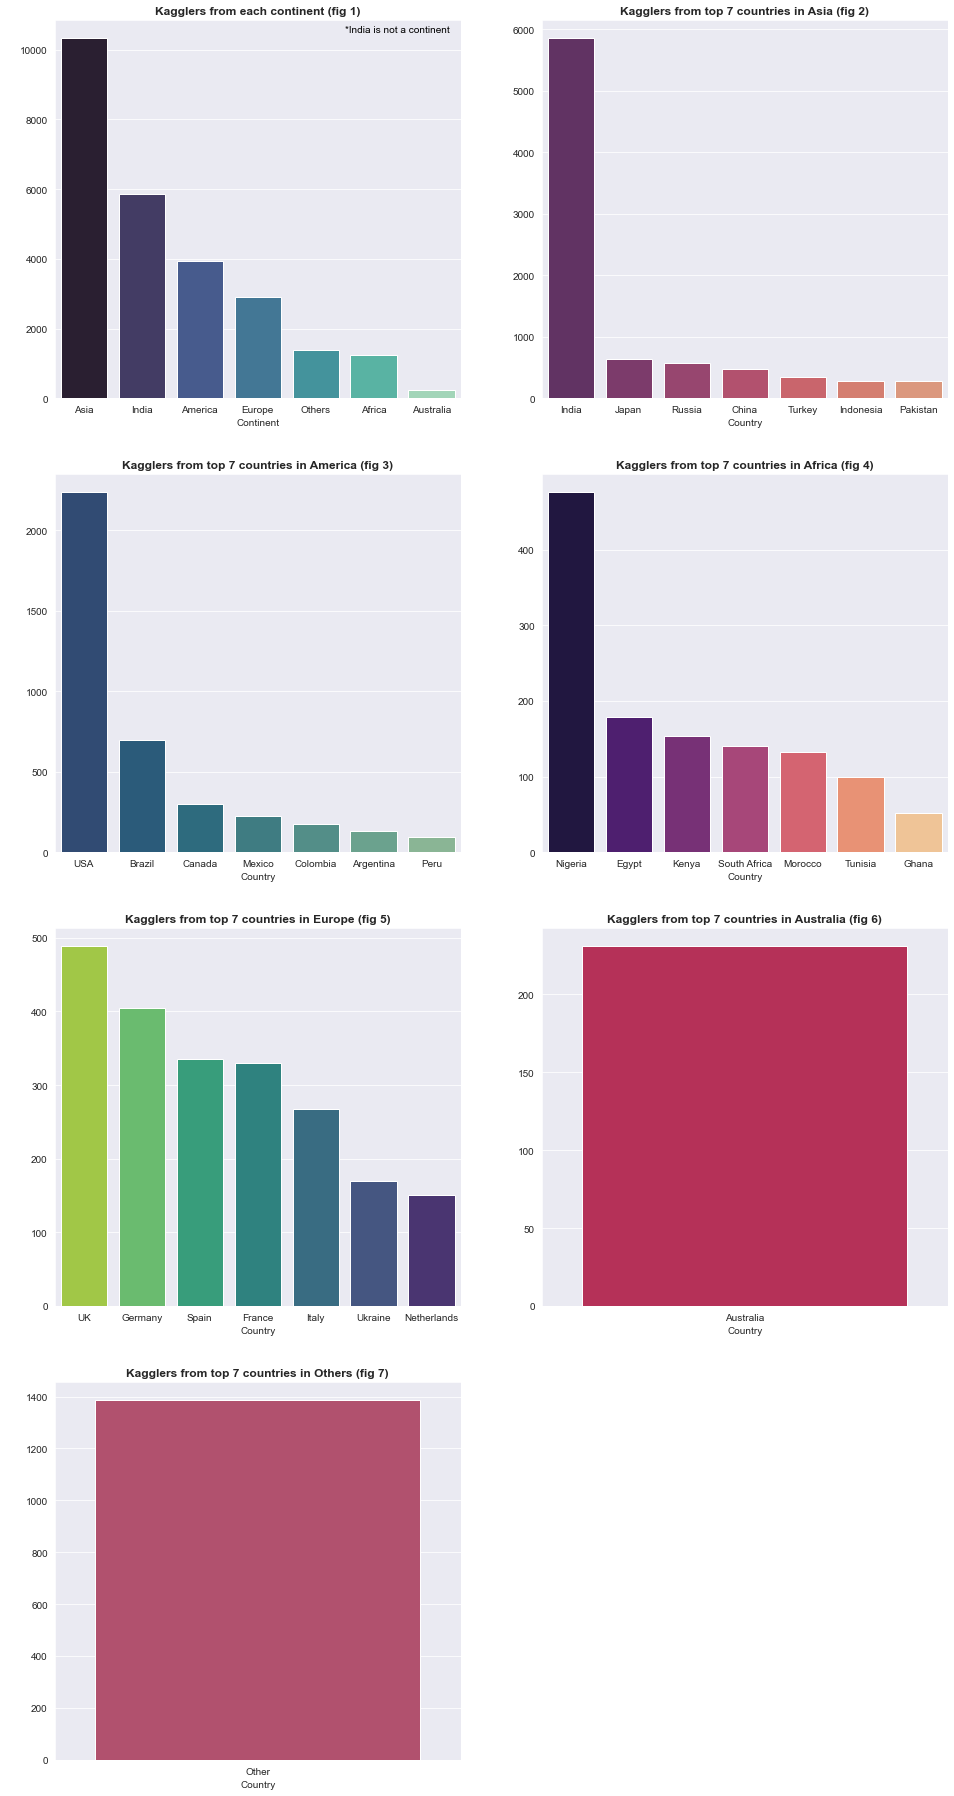

In [19]:
fig,ax = plt.subplots(4,2,figsize=(16,32))
# one plot each for continents and one for the world. One will be empty.
barw = sns.barplot(data=countw, x='Continent', y='Count', ax=ax[0][0], palette='mako')

#ax[0][0].add_patch(Rectangle((x_loc,y_loc),width,height,fc='#36bdc2'))
ax[0][0].text(4.5,10500,'*India is not a continent',c='k')
barw.set_title('Kagglers from each continent (fig 1)', fontweight='bold')
barw.set_ylabel(' ')

for data,continent,i,palette in zip(countrydfs,continents,range(len(continents)),palettes):
    i +=1
    r = i//2
    c = i%2
    bar = sns.barplot(data=data, x='Country',y='Count',ax=ax[r][c],palette=palette)
    bar.set_title(f'Kagglers from top 7 countries in {continent} (fig {i+1})', fontweight='bold')
    bar.set_ylabel(' ')
    

ax[3][1].remove() # removing the one additional axis which was there

In [20]:
survey_dfs = [survey2020_asia,survey2020_america,survey2020_africa,survey2020_europe,survey2020_Aus,survey2020_others]

In [21]:
sns.set_style('white')

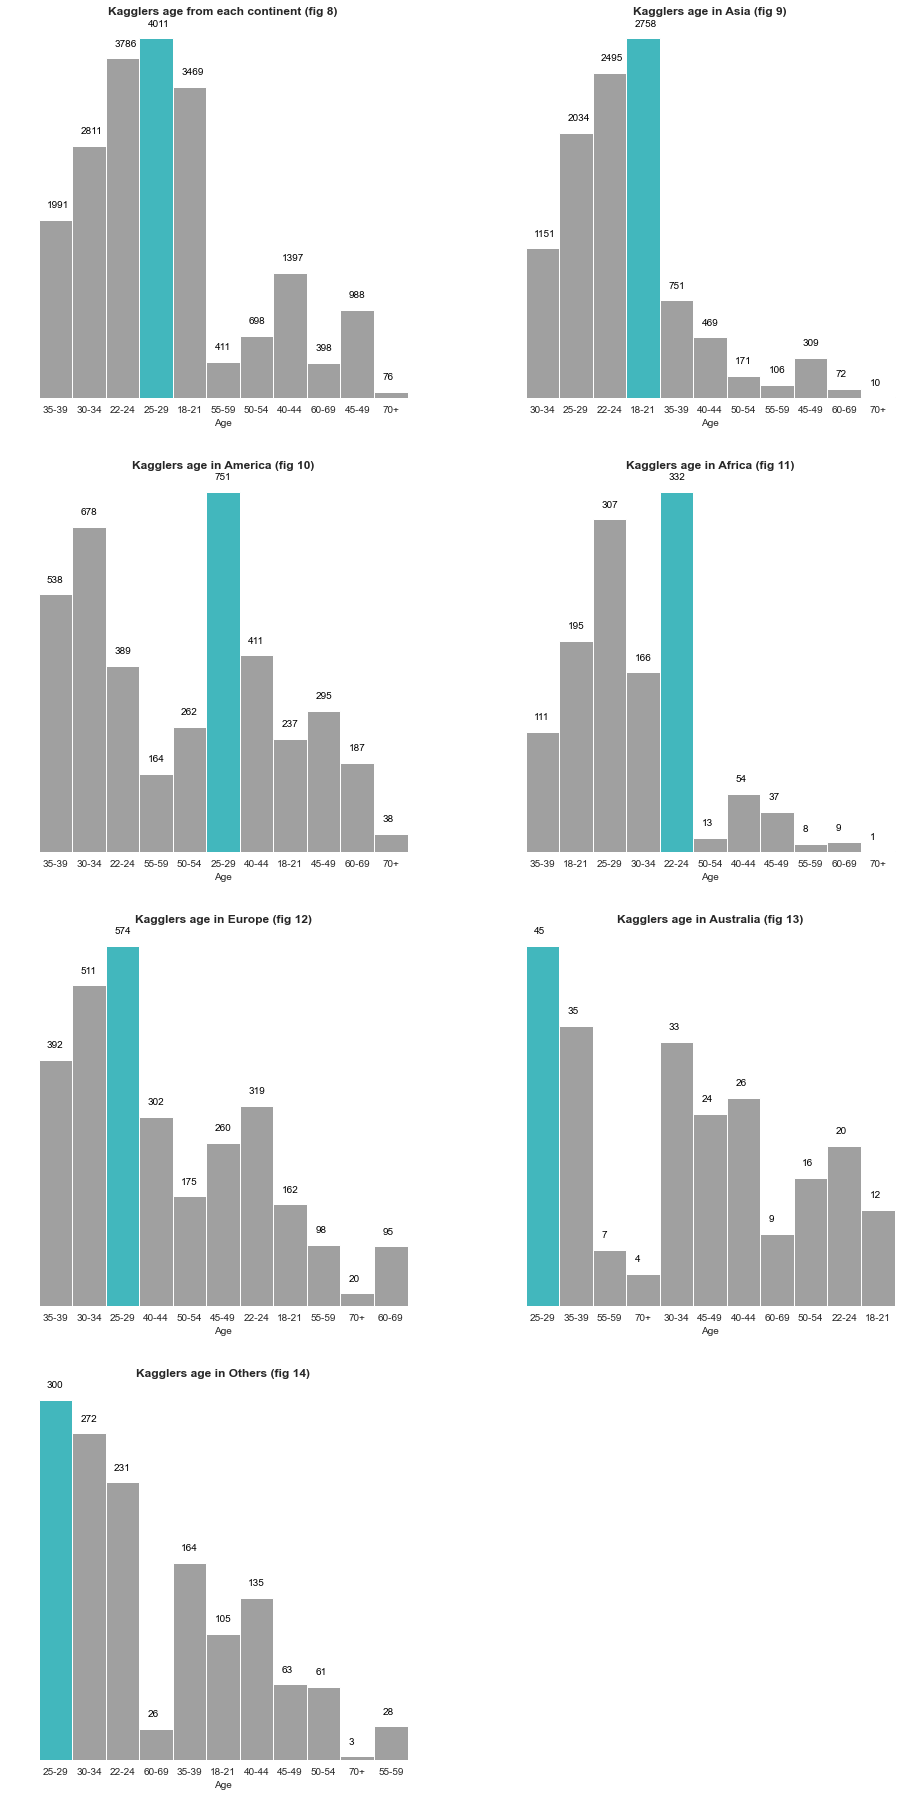

In [22]:
fig2,ax_1 = plt.subplots(4,2,figsize=(16,32))
# one plot each for continents and one for the world. One will be empty.
axis0 = ax_1[0][0]
barw = sns.histplot(data=survey2020, x='Q1',ax=axis0, color='grey')
barw.set_xlabel('Age')
barw.set_title('Kagglers age from each continent (fig 8)', fontweight='bold')
barw.set_ylabel(' ')
axis0.tick_params(axis='y',labelleft=False)
for spine in axis0.spines.values():
    spine.set_visible(0)
patch_h = []
for patch in barw.patches:
    reading = patch.get_height()
    patch_h.append(reading)
    _,ymax = axis0.get_ylim()
    y = reading + ymax/30
    x = patch.get_x() +  patch.get_width()/4
    axis0.annotate(str(reading),(x,y), c='k')
indxtallest = np.argmax(patch_h)
barw.patches[indxtallest].set_facecolor('#42b7bd')
    
for data,continent,i,palette in zip(survey_dfs,continents,range(len(continents)),palettes):
    i +=1
    r = i//2
    c = i%2
    axis = ax_1[r][c]
    bar = sns.histplot(data=data, x='Q1',ax=axis,color='grey')
    bar.set_xlabel('Age')
    bar.set_title(f'Kagglers age in {continent} (fig {i+8})', fontweight='bold')
    bar.set_ylabel(' ')
    axis.tick_params(axis='y',labelleft=False)
    
    for spine in axis.spines.values():
        spine.set_visible(False)
    
    patch_h = []
    for patch in bar.patches:
        reading = patch.get_height()
        patch_h.append(reading)
        _,ymax = axis.get_ylim()
        y = reading + ymax/30
        x = patch.get_x() + patch.get_width()/4
        axis.annotate(str(reading),(x,y), c='k')
    
    indxtallest = np.argmax(patch_h)
    bar.patches[indxtallest].set_facecolor('#42b7bd')
        
    
ax_1[3][1].remove() # removing the one additional axis which was there

 


In [23]:
survey2020['Q24'].unique()

array([nan, '100,000-124,999', '15,000-19,999', '125,000-149,999',
       '70,000-79,999', '30,000-39,999', '90,000-99,999', '1,000-1,999',
       '$0-999', '10,000-14,999', '150,000-199,999', '60,000-69,999',
       '4,000-4,999', '> $500,000', '300,000-500,000', '40,000-49,999',
       '25,000-29,999', '80,000-89,999', '7,500-9,999', '50,000-59,999',
       '250,000-299,999', '5,000-7,499', '2,000-2,999', '20,000-24,999',
       '200,000-249,999', '3,000-3,999'], dtype=object)

In [24]:
col_details['Q24']

'What is your current yearly compensation (approximate $USD)?'

In [25]:
survey2020['Q24'].value_counts()

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: Q24, dtype: int64

In [26]:
cmpcat_list = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", 
                                 "5,000-7,499", "7,500-9,999", "10,000-14,999", "15,000-19,999", 
                                 "20,000-24,999", "25,000-29,999", "30,000-39,999", "40,000-49,999", 
                                 "50,000-59,999", "60,000-69,999", "70,000-79,999", "80,000-89,999", "90,000-99,999", 
                                 "100,000-124,999", "125,000-149,999", "150,000-199,999", "200,000-249,999", 
                                 "250,000-299,999", "300,000-500,000", "> $500,000"]


In [27]:
compensation_df = survey2020['Q24'].value_counts().to_frame().reset_index(drop=False)
compensation_df.columns = ['Compensation','Count']
compensation_df['Compensation'] = pd.Categorical(compensation_df['Compensation'],cmpcat_list)
compensation_df.sort_values('Compensation',ascending=True,inplace=True,ignore_index=True)
compensation_df.set_index('Compensation',inplace=True)
compensation_df.columns = ['World']

compasia = survey2020_asia['Q24'].value_counts().to_frame().reset_index(drop=False)
compasia.columns = ['Compensation','Count']
compasia['Compensation'] = pd.Categorical(compasia['Compensation'],cmpcat_list)
compasia.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compasia.set_index('Compensation',inplace=True)
compasia.columns = ['Asia']

compamerica = survey2020_america['Q24'].value_counts().to_frame().reset_index(drop=False)
compamerica.columns = ['Compensation','Count']
compamerica['Compensation'] = pd.Categorical(compamerica['Compensation'],cmpcat_list)
compamerica.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compamerica.set_index('Compensation',inplace=True)
compamerica.columns = ['America']

compafrica = survey2020_africa['Q24'].value_counts().to_frame().reset_index(drop=False)
compafrica.columns = ['Compensation','Count']
compafrica['Compensation'] = pd.Categorical(compafrica['Compensation'],cmpcat_list)
compafrica.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compafrica.set_index('Compensation',inplace=True)
compafrica.columns = ['Africa']

compeurope = survey2020_europe['Q24'].value_counts().to_frame().reset_index(drop=False)
compeurope.columns = ['Compensation','Count']
compeurope['Compensation'] = pd.Categorical(compeurope['Compensation'],cmpcat_list)
compeurope.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compeurope.set_index('Compensation',inplace=True)
compeurope.columns = ['Europe']

compaus = survey2020_Aus['Q24'].value_counts().to_frame().reset_index(drop=False)
compaus.columns = ['Compensation','Count']
compaus['Compensation'] = pd.Categorical(compaus['Compensation'],cmpcat_list)
compaus.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compaus.set_index('Compensation',inplace=True)
compaus.columns = ['Australia']

compothers = survey2020_others['Q24'].value_counts().to_frame().reset_index(drop=False)
compothers.columns = ['Compensation','Count']
compothers['Compensation'] = pd.Categorical(compothers['Compensation'],cmpcat_list)
compothers.sort_values('Compensation', ascending=True, inplace=True,ignore_index=True)
compothers.set_index('Compensation',inplace=True)
compothers.columns = ['Others']


_ = 'this variable is just to make this cell to output anything'

In [28]:
all_country_df = pd.concat([compasia, compamerica, compafrica, compeurope, compaus, compothers],axis=1)
all_country_df.head()

,Asia,America,Africa,Europe,Australia,Others
Compensation,,,,,,
$0-999,1220,262,282.0,171,15.0,178
"1,000-1,999",296,102,60.0,57,3.0,63
"2,000-2,999",163,62,35.0,38,1.0,31
"3,000-3,999",153,35,32.0,24,NaN,20
"4,000-4,999",194,27,20.0,17,1.0,20


Text(0, -0.4, 'An amazingly huge number of people are in $0-999 per year salary range')

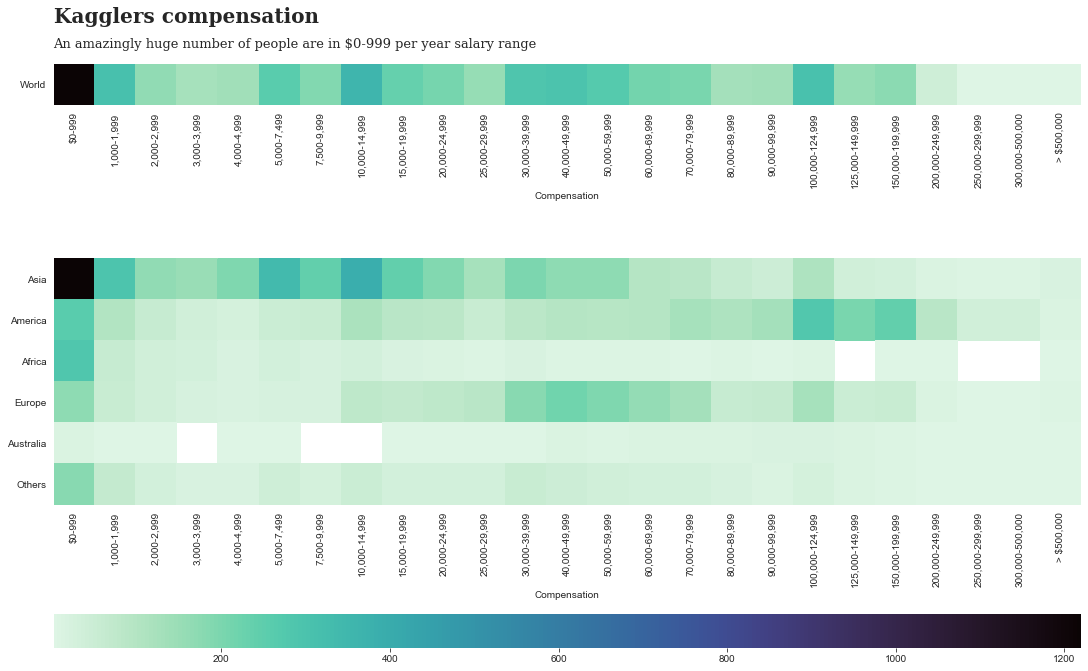

In [29]:
fig3 = plt.figure(figsize=(15,10),constrained_layout=True)
gs = fig3.add_gridspec(2,1)
gs.update(wspace=0,hspace=0.0001)
ax0 = fig3.add_subplot(gs[0,0])
ax1 = fig3.add_subplot(gs[1,0])

sns.set_style('darkgrid')
cmap = 'mako_r'
hm = sns.heatmap(data=compensation_df.T, ax=ax0, cbar=False, cbar_kws={'orientation':'horizontal'},square=True,
                cmap=cmap)
hm2 = sns.heatmap(data=all_country_df.T , ax=ax1, cbar_kws={'orientation':'horizontal'}, square=True,
                 cmap=cmap)
ax0.tick_params(axis='y',labelrotation=0)
ax1.tick_params(axis='y', labelrotation=0)
ax0.text(0,-1,'Kagglers compensation', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(0,-0.4, 'An amazingly huge number of people are in $0-999 per year salary range', fontsize=13, fontweight='light',fontfamily='serif')


In [30]:
# without 0-999
compworld_new = compensation_df.drop('$0-999')
all_country_new = all_country_df.drop('$0-999')

In [31]:
compworld_new.T

Compensation,"1,000-1,999","2,000-2,999","3,000-3,999","4,000-4,999","5,000-7,499","7,500-9,999","10,000-14,999","15,000-19,999","20,000-24,999","25,000-29,999",...,"70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999","250,000-299,999","300,000-500,000","> $500,000"
World,581,330,264,279,488,371,665,449,404,310,...,394,273,280,573,315,347,115,48,55,50


Text(0, -0.4, 'Excluding $0-999 per year salary range')

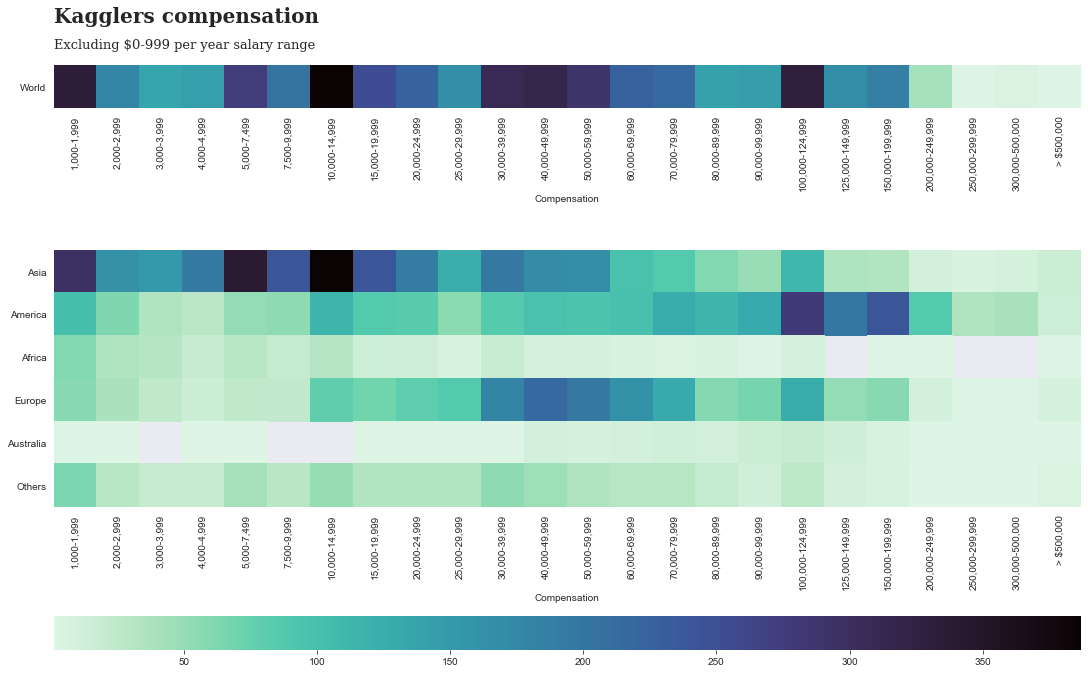

In [32]:
fig4 = plt.figure(figsize=(15,10), constrained_layout=True)
gs = fig4.add_gridspec(2,1)
gs.update(wspace=0,hspace=0.0001)
ax3 = fig4.add_subplot(gs[0,0])
ax4 = fig4.add_subplot(gs[1,0])

sns.set_style('darkgrid')
cmap = 'mako_r'
hm = sns.heatmap(data=compworld_new.T, ax=ax3, cbar=False, cbar_kws={'orientation':'horizontal'},square=True,
                cmap=cmap)
hm2 = sns.heatmap(data=all_country_new.T , ax=ax4, cbar_kws={'orientation':'horizontal'}, square=True,
                 cmap=cmap)
ax3.tick_params(axis='y',labelrotation=0)
ax4.tick_params(axis='y', labelrotation=0)
ax3.text(0,-1,'Kagglers compensation', fontsize=20, fontweight='bold', fontfamily='serif')
ax3.text(0,-0.4, 'Excluding $0-999 per year salary range', fontsize=13, fontweight='light',fontfamily='serif')

In [33]:
from pandas.api.types import CategoricalDtype
cat = CategoricalDtype(categories=cmpcat_list,ordered=True)
_ = survey2020['Q24'].astype(cat)

Text(0.5, 0, 'Salary range')

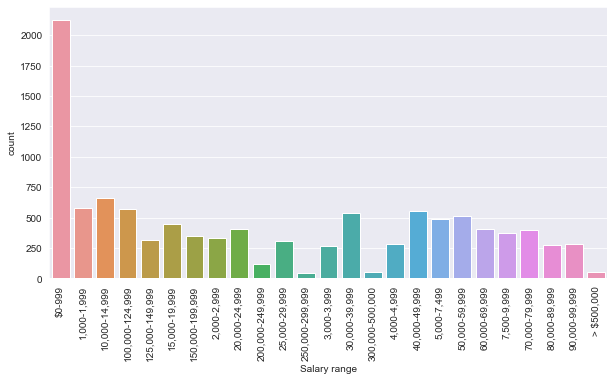

In [38]:
fig5,ax= plt.subplots(figsize=(10,5))
dis = sns.countplot(data=survey2020.sort_values('Q24'), x='Q24', ax=ax)
ax.tick_params(axis='x', which='major',labelrotation=90)
ax.set_xlabel('Salary range')

In [39]:
survey2020.sort_values('Q24')['Q24'].unique()

array(['$0-999', '1,000-1,999', '10,000-14,999', '100,000-124,999',
       '125,000-149,999', '15,000-19,999', '150,000-199,999',
       '2,000-2,999', '20,000-24,999', '200,000-249,999', '25,000-29,999',
       '250,000-299,999', '3,000-3,999', '30,000-39,999',
       '300,000-500,000', '4,000-4,999', '40,000-49,999', '5,000-7,499',
       '50,000-59,999', '60,000-69,999', '7,500-9,999', '70,000-79,999',
       '80,000-89,999', '90,000-99,999', '> $500,000', nan], dtype=object)

### Gender

In [40]:
survey2020['Q2'].unique()

array(['Man', 'Woman', 'Prefer to self-describe', 'Prefer not to say',
       'Nonbinary'], dtype=object)

In [65]:
gencount_world = survey2020['Q2'].value_counts().to_dict()
gencount_asia = survey2020_asia['Q2'].value_counts().to_dict()
gencount_america = survey2020_america['Q2'].value_counts().to_dict()
gencount_africa = survey2020_africa['Q2'].value_counts().to_dict()
gencount_europe = survey2020_europe['Q2'].value_counts().to_dict()
gencount_aus = survey2020_Aus['Q2'].value_counts().to_dict()
gencount_others = survey2020_others['Q2'].value_counts().to_dict()

gencount_dicts = [gencount_asia, gencount_america, gencount_africa, gencount_europe, gencount_aus,
               gencount_others]
df_names = ['Asia','America','Africa','Europe','Australia','Others']

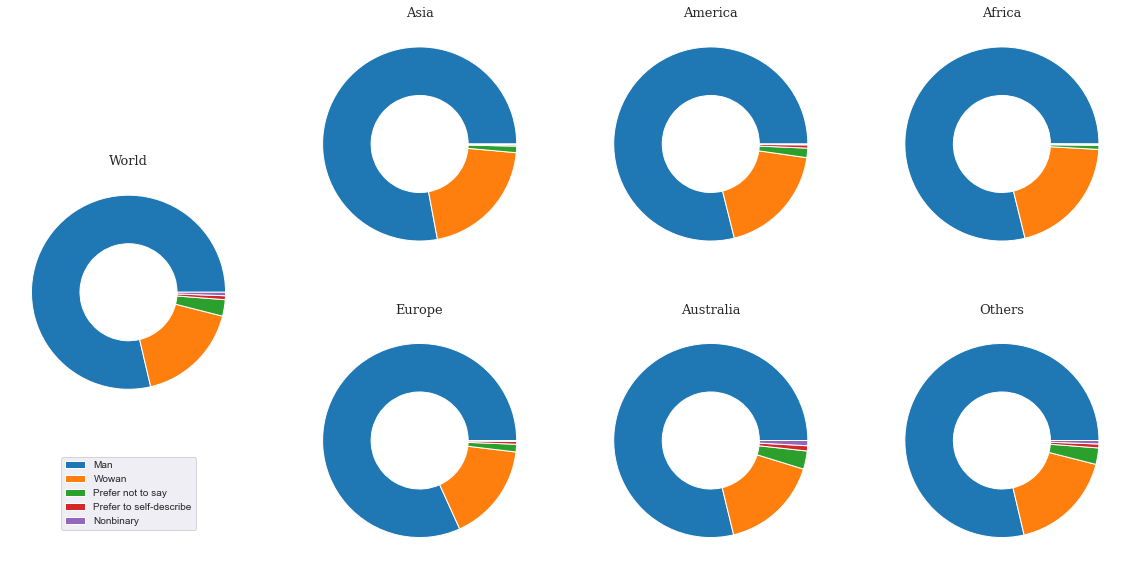

In [75]:
fig6 = plt.figure(figsize=(20,10))
gs = fig6.add_gridspec(2,4)
ax0 = fig6.add_subplot(gs[:,0])
ax123 = [fig6.add_subplot(gs[0,i+1]) for i in range(3)]
ax456= [fig6.add_subplot(gs[1,i+1]) for i in range(3)]
ax_list = ax123+ax456
cmap = sns.color_palette("magma", as_cmap=True)

ax0.pie(countdict.values(),wedgeprops=dict(width=0.5))
ax0.set_title('World',fontweight='light',fontsize=13,fontfamily='serif')
ax0.legend(['Man','Wowan','Prefer not to say','Prefer to self-describe','Nonbinary'], loc='lower center',
           bbox_to_anchor=(0.5,-0.5))

for countdict, title, ax in zip(gencount_dicts,df_names,ax_list):
    ax.pie(countdict.values(),wedgeprops=dict(width=0.5))
    ax.set_title(title,fontweight='light',fontsize=13,fontfamily='serif')

